In [37]:
import pandas as pd
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, Dropout

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [38]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [39]:
X = data[:, 2:].reshape(-1, 28, 28, 1)
y = data[:, 1]

In [40]:
ohe = OneHotEncoder(categories="auto")
y_hot = ohe.fit_transform(y.reshape(-1, 1))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [42]:
in_layer = Input(shape=[28, 28, 1])
layer_1 = Conv2D(32, (3,3), activation="relu")(in_layer)
layer_2 = MaxPool2D()(layer_1)
layer_3 = Conv2D(64, (3,3), activation="relu")(layer_2)
layer_4 = MaxPool2D()(layer_3)
drop = Dropout(.25)(layer_4)
layer_5 = Conv2D(128, (3,3), activation="relu")(drop)
layer_6 = MaxPool2D()(layer_5)

flatten = Flatten()(layer_6)

d1 = Dense(400, activation="tanh")(flatten)
d2 = Dense(100, activation="tanh")(d1)
d3 = Dense(50, activation="tanh")(d2)
out = Dense(10, activation="softmax")(d3)


In [11]:
model = Model(inputs=[in_layer], outputs=[out])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [13]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [14]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
5360/5360 [==============================] - 3s 632us/step - loss: 1.7584 - acc: 0.4459
Epoch 2/10
5360/5360 [==============================] - 3s 545us/step - loss: 0.7352 - acc: 0.8063
Epoch 3/10
5360/5360 [==============================] - 3s 543us/step - loss: 0.3678 - acc: 0.9069
Epoch 4/10
5360/5360 [==============================] - 3s 546us/step - loss: 0.2529 - acc: 0.9317
Epoch 5/10
5360/5360 [==============================] - 3s 547us/step - loss: 0.1862 - acc: 0.9549
Epoch 6/10
5360/5360 [==============================] - 3s 547us/step - loss: 0.1544 - acc: 0.9595
Epoch 7/10
5360/5360 [==============================] - 3s 540us/step - loss: 0.1401 - acc: 0.9588
Epoch 8/10
5360/5360 [==============================] - 3s 565us/step - loss: 0.1189 - acc: 0.9666
Epoch 9/10
5360/5360 [==============================] - 3s 611us/step - loss: 0.1057 - acc: 0.9726
Epoch 10/10
5360/5360 [==============================] - 3s 5

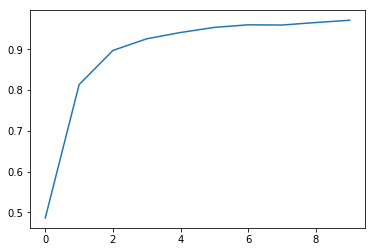

In [11]:
plt.plot(hist.history["acc"])

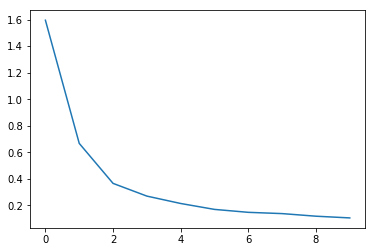

In [12]:
plt.plot(hist.history["loss"])

In [13]:
model.evaluate(X_test, y_test)

2640/2640 [==============================] - 1s 209us/step


[0.11496261781589552, 0.9655303030303031]

In [14]:
m2 = Model(inputs = [in_layer], outputs=[layer_1])

In [15]:
m2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [16]:
res = m2.predict(X_test[:1])

In [17]:
res.shape

(1, 26, 26, 32)

In [4]:
y_test[:1].shape

NameError: name 'y_test' is not defined

In [ ]:
for i in range(res.shape[2]):
    plt.figure()
    img = res[:, :, i]
    plt.imshow(img)

In [22]:
combined = model.layers[:-4]

In [30]:
de1 = Dense(400, activation="tanh")(combined[-1].output)
de2 = Dense(100, activation="tanh")(de1)
de3 = Dense(50, activation="tanh")(de2)
eout = Dense(2, activation="softmax")(d3)

In [31]:
for layer in combined:
    layer.trainable = False

In [32]:
m3 = Model(inputs = [combined[0].input], outputs=[eout])

In [33]:
m3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [34]:
m3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

In [35]:
y_oe_hot = ohe.fit_transform((y % 2).reshape(-1, 1))

In [36]:
m3.fit(X, y_oe_hot, epochs=10, batch_size=200)

Epoch 1/10
8000/8000 [==============================] - 2s 280us/step - loss: 0.1298 - acc: 0.9534
Epoch 2/10
8000/8000 [==============================] - 2s 227us/step - loss: 0.0449 - acc: 0.9868
Epoch 3/10
8000/8000 [==============================] - 2s 229us/step - loss: 0.0513 - acc: 0.9829
Epoch 4/10
8000/8000 [==============================] - 2s 225us/step - loss: 0.0439 - acc: 0.9865
Epoch 5/10
8000/8000 [==============================] - 2s 230us/step - loss: 0.0448 - acc: 0.9841
Epoch 6/10
8000/8000 [==============================] - 2s 269us/step - loss: 0.0389 - acc: 0.9870
Epoch 7/10
8000/8000 [==============================] - 2s 259us/step - loss: 0.0475 - acc: 0.9838
Epoch 8/10
8000/8000 [==============================] - 2s 244us/step - loss: 0.0392 - acc: 0.9865
Epoch 9/10
8000/8000 [==============================] - 2s 247us/step - loss: 0.0334 - acc: 0.9875
Epoch 10/10
8000/8000 [==============================] - 2s 242us/step - loss: 0.0400 - acc: 0.9859


In [43]:
m3.fit_generator?